<a href="https://colab.research.google.com/github/SheidaMajouni/GNN/blob/main/CS224W_Colab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS224W - Colab 2**

In Colab 2, we will work to construct our own graph neural network using PyTorch Geometric (PyG) and then apply that model on two Open Graph Benchmark (OGB) datasets. These two datasets will be used to benchmark your model's performance on two different graph-based tasks: 1) node property prediction, predicting properties of single nodes (node classification) and 2) graph property prediction, predicting properties of entire graphs or subgraphs.

First, we will learn how PyTorch Geometric stores graphs as PyTorch tensors.

Then, we will load and inspect one of the Open Graph Benchmark (OGB) datasets by using the `ogb` package. OGB is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. The `ogb` package not only provides data loaders for each dataset but also model evaluators.

Lastly, we will build our own graph neural network using PyTorch Geometric. We will then train and evaluate our model on the OGB node property prediction and graph property prediction tasks.

**Note**: Make sure to **sequentially run all the cells in each section**, so that the intermediate variables / packages will carry over to the next cell

We recommend you save a copy of this colab in your drive so you don't lose progress!

Have fun and good luck on Colab 2 :)

# Device
You might need to use a GPU for this Colab to run quickly.

Please click `Runtime` and then `Change runtime type`. Then set the `hardware accelerator` to **GPU**.

# Setup
As discussed in Colab 0, the installation of PyG on Colab can be a little bit tricky. First let us check which version of PyTorch you are running

ownload the necessary packages for PyG. Make sure that your version of torch matches the output from the cell above. In case of any issues, more information can be found on the [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

In [1]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
print("torch-scatter installed")
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
print("torch-sparse installed")
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
print("torch-geometric installed")

!pip install ogb


2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 93.6 MB/s eta 0:00:00
torch-scatter installed
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 91.1 MB/s eta 0:00:00
torch-sparse installed
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
torch-geometric installed
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=db0fbedc1d13cec5e6585b9888a8fcb4cc5500abff3f3957a699386de41155c6
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


# 1) PyTorch Geometric (Datasets and Data)


PyTorch Geometric has two classes for storing and/or transforming graphs into tensor format. One is `torch_geometric.datasets`, which contains a variety of common graph datasets. Another is `torch_geometric.data`, which provides the data handling of graphs in PyTorch tensors.

In this section, we will learn how to use `torch_geometric.datasets` and `torch_geometric.data` together.

## PyG Datasets

The `torch_geometric.datasets` class has many common graph datasets. Here we will explore its usage through one example dataset.

**Sheida**

TUDataset = A variety of graph kernel benchmark datasets ( a dataset with graphs as samples like protein)

we are interested in ENZYMES:

Name = ENZYMES

\#graphs = 600

\#nodes = ~32.6

\#edges = ~124.3

\#features = 3

\#classes = 6

In [2]:
from torch_geometric.datasets import TUDataset

if 'IS_GRADESCOPE_ENV' not in os.environ:
  root = './enzymes'
  name = 'ENZYMES'

  # The ENZYMES dataset
  pyg_dataset= TUDataset(root, name)

  # You will find that there are 600 graphs in this dataset
  print(pyg_dataset)

Extracting enzymes/ENZYMES/ENZYMES.zip
Processing...


ENZYMES(600)


Done!


## Question 1: What is the number of classes and number of features in the ENZYMES dataset? (5 points)

In [3]:
def get_num_classes(pyg_dataset):
  # TODO: Implement a function that takes a PyG dataset object
  # and returns the number of classes for that dataset.

  num_classes = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.
  num_classes = pyg_dataset.num_classes

  #########################################

  return num_classes

def get_num_features(pyg_dataset):
  # TODO: Implement a function that takes a PyG dataset object
  # and returns the number of features for that dataset.

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.
  num_features = pyg_dataset.num_features
  #########################################

  return num_features

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_classes = get_num_classes(pyg_dataset)
  num_features = get_num_features(pyg_dataset)
  print("{} dataset has {} classes".format(name, num_classes))
  print("{} dataset has {} features".format(name, num_features))

ENZYMES dataset has 6 classes
ENZYMES dataset has 3 features


## PyG Data

Each PyG dataset stores a list of `torch_geometric.data.Data` objects, where each `torch_geometric.data.Data` object represents a graph. We can easily get the `Data` object by indexing into the dataset.

For more information such as what is stored in the `Data` object, please refer to the [documentation](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data).

## Question 2: What is the label of the graph with index 100 in the ENZYMES dataset? (5 points)

In [4]:
def get_graph_class(pyg_dataset, idx):
  # TODO: Implement a function that takes a PyG dataset object,
  # an index of a graph within the dataset, and returns the class/label
  # of the graph (as an integer).

  label = -1

  ############# Your code here ############
  ## (~1 line of code)
  label = pyg_dataset[idx].y[0] # ==> pyg_dataset[idx].y = [4] so we get first index
  #########################################

  return label

# Here pyg_dataset is a dataset for graph classification
if 'IS_GRADESCOPE_ENV' not in os.environ:
  graph_0 = pyg_dataset[0]
  print(graph_0)
  idx = 100
  label = get_graph_class(pyg_dataset, idx)
  print('Graph with index {} has label {}'.format(idx, label))

Data(edge_index=[2, 168], x=[37, 3], y=[1])
Graph with index 100 has label 4


## Question 3: How many edges does the graph with index 200 have? (5 points)

In [5]:
def get_graph_num_edges(pyg_dataset, idx):
  # TODO: Implement a function that takes a PyG dataset object,
  # the index of a graph in the dataset, and returns the number of
  # edges in the graph (as an integer). You should not count an edge
  # twice if the graph is undirected. For example, in an undirected
  # graph G, if two nodes v and u are connected by an edge, this edge
  # should only be counted once.

  num_edges = 0

  ############# Your code here ############
  ## Note:
  ## 1. You can't return the data.num_edges directly
  ## 2. We assume the graph is undirected
  ## 3. Look at the PyG dataset built in functions
  ## (~4 lines of code)
  # _____num_edges = len(pyg_dataset[idx].edge_index[1])/2________

  # my answer is right if there is no self loop like here. otherwise
  # we should know that edge index contain one edge twice like 1-12 and
  # 12-1 so we only count edges that first_node < second_node (or equal)
  edges = pyg_dataset[idx].edge_index
  num_edges = edges[:, edges[0, :] <= edges[1, :]].shape[1]
  # It filtered all unique edges, which is a tuple of two integers the
  # number of rows, and number of columns we want number of col

  #########################################

  return num_edges

if 'IS_GRADESCOPE_ENV' not in os.environ:
  idx = 200
  num_edges = get_graph_num_edges(pyg_dataset, idx)
  print('Graph with index {} has {} edges'.format(idx, num_edges))

Graph with index 200 has 53 edges


# 2) Open Graph Benchmark (OGB)

The Open Graph Benchmark (OGB) is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. Its datasets are automatically downloaded, processed, and split using the OGB Data Loader. The model performance can then be evaluated by using the OGB Evaluator in a unified manner.

## Dataset and Data

OGB also supports PyG dataset and data classes. Here we take a look on the `ogbn-arxiv` dataset.

In [6]:
import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset

dataset_name = 'ogbn-arxiv'
  # cosidered as small scale dataset and Multi-class classification
  # directed graph representing the citation network between all CS arXiv papers
# Load the dataset and transform it to sparse tensor
dataset = PygNodePropPredDataset(name=dataset_name,
                                 transform=T.ToSparseTensor())
print('The {} dataset has {} graph'.format(dataset_name, len(dataset)))

# Extract the graph
data = dataset[0]
print(data)

Downloaded 0.08 GB: 100%|██████████| 81/81 [00:08<00:00,  9.19it/s]


Extracting dataset/arxiv.zip


Processing...


Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:00<00:00, 9078.58it/s]


Converting graphs into PyG objects...


100%|██████████| 1/1 [00:00<00:00, 4957.81it/s]

Saving...
The ogbn-arxiv dataset has 1 graph



Done!


Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343, nnz=1166243])


## Question 4: How many features are in the ogbn-arxiv graph? (5 points)

In [7]:
def graph_num_features(data):
  # TODO: Implement a function that takes a PyG data object,
  # and returns the number of features in the graph (as an integer).

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  num_features = data.num_features
  #########################################

  return num_features

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_features = graph_num_features(data)
  print('The graph has {} features'.format(num_features))

The graph has 128 features


# 3) GNN: Node Property Prediction

In this section we will build our first graph neural network using PyTorch Geometric. Then we will apply it to the task of node property prediction (node classification).

Specifically, we will use GCN as the foundation for your graph neural network ([Kipf et al. (2017)](https://arxiv.org/pdf/1609.02907.pdf)). To do so, we will work with PyG's built-in `GCNConv` layer.

## Setup

In [8]:
import torch
import torch.nn.functional as F
print(torch.__version__)

# The PyG built-in GCNConv
from torch_geometric.nn import GCNConv

import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

2.0.1+cu118


## Load and Preprocess the Dataset

**sheida**

Make the adjacency matrix to symmetric ==> make a directed graph undirected

1. It reduces the space required to store the matrix by half, since only the upper or lower triangular part of the matrix contains useful information.
2. It simplifies some operations on the matrix, such as finding its eigenvalues and eigenvectors, which are important in spectral graph theory.
3. It avoids confusion and inconsistency when working with different representations of the same graph.

In [9]:
dataset_name = 'ogbn-arxiv'
dataset = PygNodePropPredDataset(name=dataset_name,
                                 transform=T.ToSparseTensor())
data = dataset[0]

# Make the adjacency matrix to symmetric
data.adj_t = data.adj_t.to_symmetric()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# If you use GPU, the device should be cuda
print('Device: {}'.format(device))

data = data.to(device)
# returns a dictionary with the indices of the train, validation and test sets
split_idx = dataset.get_idx_split()
# assigns the train indices to the variable train_idx
train_idx = split_idx['train'].to(device)

Device: cuda


## GCN Model

Now we will implement our GCN model!

Please follow the figure below to implement the `forward` function.


![test](https://drive.google.com/uc?id=128AuYAXNXGg7PIhJJ7e420DoPWKb-RtL)

In [10]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # TODO: Implement a function that initializes self.convs,
        # self.bns, and self.softmax.

        super(GCN, self).__init__()

        # A list of GCNConv layers
        self.convs = torch.nn.ModuleList([GCNConv(input_dim, hidden_dim)]+
                                          [GCNConv(in_channels=hidden_dim, out_channels=hidden_dim)
                                          for i in range(num_layers-2)] +
                                          [GCNConv(hidden_dim, output_dim)])

        # A list of 1D batch normalization layers
        self.bns = torch.nn.ModuleList([torch.nn.BatchNorm1d(hidden_dim)
                                          for i in range(num_layers-1)])

        # The log softmax layer
        self.softmax = torch.nn.LogSoftmax()

        ############# Your code here ############
        ## Note:
        ## 1. You should use torch.nn.ModuleList for self.convs and self.bns
        ## 2. self.convs has num_layers GCNConv layers
        ## 3. self.bns has num_layers - 1 BatchNorm1d layers
        ## 4. You should use torch.nn.LogSoftmax for self.softmax
        ## 5. The parameters you can set for GCNConv include 'in_channels' and
        ## 'out_channels'. For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        ## 6. The only parameter you need to set for BatchNorm1d is 'num_features'
        ## For more information please refer to the documentation:
        ## https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        ## (~10 lines of code)


        #########################################

        # Probability of an element getting zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        # TODO: Implement a function that takes the feature tensor x and
        # edge_index tensor adj_t and returns the output tensor as
        # shown in the figure.

        for conv, bn in zip(self.convs[:-1], self.bns):
            x1 = F.relu(bn(conv(x, adj_t)))
            if self.training:
                x1 = F.dropout(x1, p=self.dropout)
            x = x1
        x = self.convs[-1](x, adj_t)
        out = x if self.return_embeds else self.softmax(x)

        # or in childish way
        # if !(self.return_embeds):
        #   out = self.softmax(x)
        # else:
        #   out = x

        ############# Your code here ############
        ## Note:
        ## 1. Construct the network as shown in the figure
        ## 2. torch.nn.functional.relu and torch.nn.functional.dropout are useful
        ## For more information please refer to the documentation:
        ## https://pytorch.org/docs/stable/nn.functional.html
        ## 3. Don't forget to set F.dropout training to self.training
        ## 4. If return_embeds is True, then skip the last softmax layer
        ## (~7 lines of code)

        #########################################

        return x, out # shedia added x for visualization

recall: Data=

Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343, nnz=1166243])

I guess there is no batch. all train together

In [11]:
def train(model, data, train_idx, optimizer, loss_fn):
    # TODO: Implement a function that trains the model by
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    ############# Your code here ############
    ## Note:
    ## 1. Zero grad the optimizer
    ## 2. Feed the data into the model
    ## 3. Slice the model output and label by train_idx
    ## 4. Feed the sliced output and label to loss_fn
    ## (~4 lines of code)
    optimizer.zero_grad()

    x_visual, out = model(data.x, data.adj_t)  # Perform forward pass.

    out_train = out[train_idx]
    y_train = data.y[train_idx].reshape(-1)

    loss = loss_fn(out_train, y_train)
    #########################################

    loss.backward()
    optimizer.step()

    return loss.item()

In [12]:
import pandas as pd
# Test function here
@torch.no_grad()
def test(model, data, split_idx, evaluator, save_model_results=False):
    # TODO: Implement a function that tests the model by
    # using the given split_idx and evaluator.
    model.eval()

    # The output of model on all data
    out = None

    ############# Your code here ############
    ## (~1 line of code)
    ## Note:
    ## 1. No index slicing here
    x_visual, out = model(data.x, data.adj_t)
    #########################################

    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': data.y[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': data.y[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': data.y[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    if save_model_results:
      print ("Saving Model Predictions")

      data = {}
      data['y_pred'] = y_pred.view(-1).cpu().detach().numpy()

      df = pd.DataFrame(data=data)
      # Save locally as csv
      df.to_csv('ogbn-arxiv_node.csv', sep=',', index=False)


    return train_acc, valid_acc, test_acc

In [13]:
# Please do not change the args
if 'IS_GRADESCOPE_ENV' not in os.environ:
  args = {
      'device': device,
      'num_layers': 3,
      'hidden_dim': 256,
      'dropout': 0.5,
      'lr': 0.01,
      'epochs': 100,
  }
  args

In [14]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  model = GCN(data.num_features, args['hidden_dim'],
              dataset.num_classes, args['num_layers'],
              args['dropout']).to(device)
  evaluator = Evaluator(name='ogbn-arxiv')

In [41]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    color = color.detach().cpu().numpy()

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

<ipython-input-10-8e9d86d9cc97>:62: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = x if self.return_embeds else self.softmax(x)


ss
<class 'numpy.ndarray'>


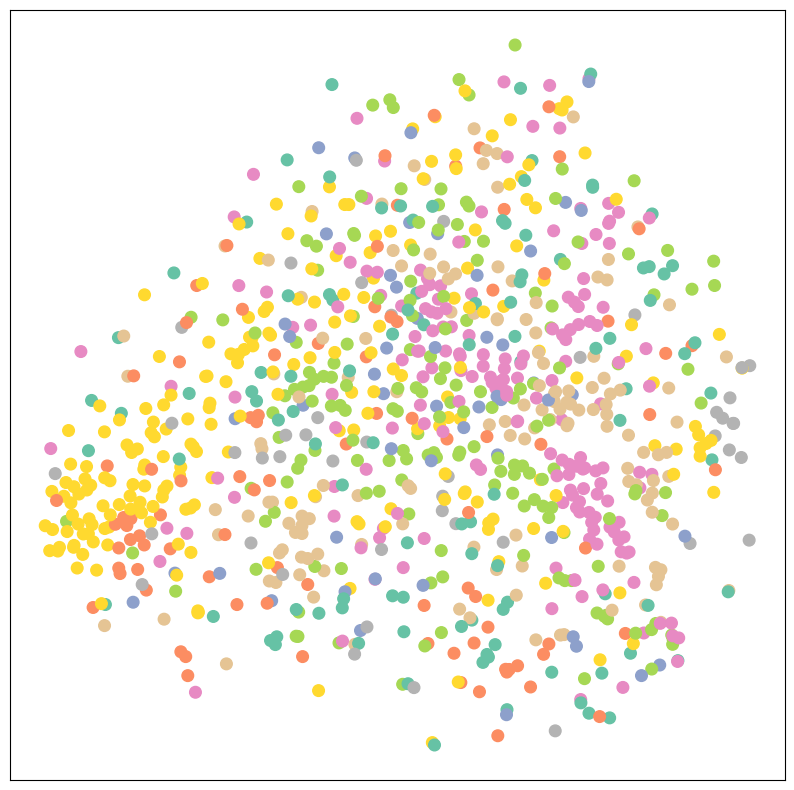

In [42]:
x_visual, out = model(data.x, data.adj_t)
visualize(x_visual[0:1000,], color=data.y[0:1000])

In [43]:
# Please do not change these args
# Training should take <10min using GPU runtime
import copy
if 'IS_GRADESCOPE_ENV' not in os.environ:
  # reset the parameters to initial random value
  model.reset_parameters()

  optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
  loss_fn = F.nll_loss

  best_model = None
  best_valid_acc = 0

  for epoch in range(1, 1 + args["epochs"]):
    loss = train(model, data, train_idx, optimizer, loss_fn)
    result = test(model, data, split_idx, evaluator)
    train_acc, valid_acc, test_acc = result
    if valid_acc > best_valid_acc: # ______________ important ___________
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)
    print(f'Epoch: {epoch:02d}, '
          f'Loss: {loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')

<ipython-input-10-8e9d86d9cc97>:62: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = x if self.return_embeds else self.softmax(x)


Epoch: 01, Loss: 4.1872, Train: 25.51%, Valid: 29.04% Test: 26.07%
Epoch: 02, Loss: 2.3392, Train: 28.00%, Valid: 24.58% Test: 29.45%
Epoch: 03, Loss: 1.9592, Train: 45.84%, Valid: 50.17% Test: 48.73%
Epoch: 04, Loss: 1.7687, Train: 36.98%, Valid: 27.81% Test: 25.76%
Epoch: 05, Loss: 1.6565, Train: 36.90%, Valid: 22.49% Test: 19.21%
Epoch: 06, Loss: 1.5678, Train: 37.24%, Valid: 23.70% Test: 20.05%
Epoch: 07, Loss: 1.4956, Train: 40.49%, Valid: 30.23% Test: 27.07%
Epoch: 08, Loss: 1.4344, Train: 44.69%, Valid: 37.29% Test: 36.24%
Epoch: 09, Loss: 1.3960, Train: 45.56%, Valid: 38.16% Test: 39.61%
Epoch: 10, Loss: 1.3672, Train: 44.87%, Valid: 37.55% Test: 40.94%
Epoch: 11, Loss: 1.3364, Train: 44.74%, Valid: 37.68% Test: 41.68%
Epoch: 12, Loss: 1.3132, Train: 45.57%, Valid: 38.82% Test: 43.06%
Epoch: 13, Loss: 1.2879, Train: 47.64%, Valid: 43.41% Test: 47.37%
Epoch: 14, Loss: 1.2705, Train: 50.88%, Valid: 49.28% Test: 52.48%
Epoch: 15, Loss: 1.2483, Train: 54.01%, Valid: 54.12% Test: 56

## Question 5: What are your `best_model` validation and test accuracies?(20 points)

Run the cell below to see the results of your best of model and save your model's predictions to a file named *ogbn-arxiv_node.csv*.

You can view this file by clicking on the *Folder* icon on the left side pannel. As in Colab 1, when you sumbit your assignment, you will have to download this file and attatch it to your submission.

In [44]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  best_result = test(best_model, data, split_idx, evaluator, save_model_results=True)
  train_acc, valid_acc, test_acc = best_result
  print(f'Best model: '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

<ipython-input-10-8e9d86d9cc97>:62: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = x if self.return_embeds else self.softmax(x)


Saving Model Predictions
Best model: Train: 73.92%, Valid: 72.06% Test: 71.38%


<ipython-input-10-8e9d86d9cc97>:62: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = x if self.return_embeds else self.softmax(x)


ss
<class 'numpy.ndarray'>


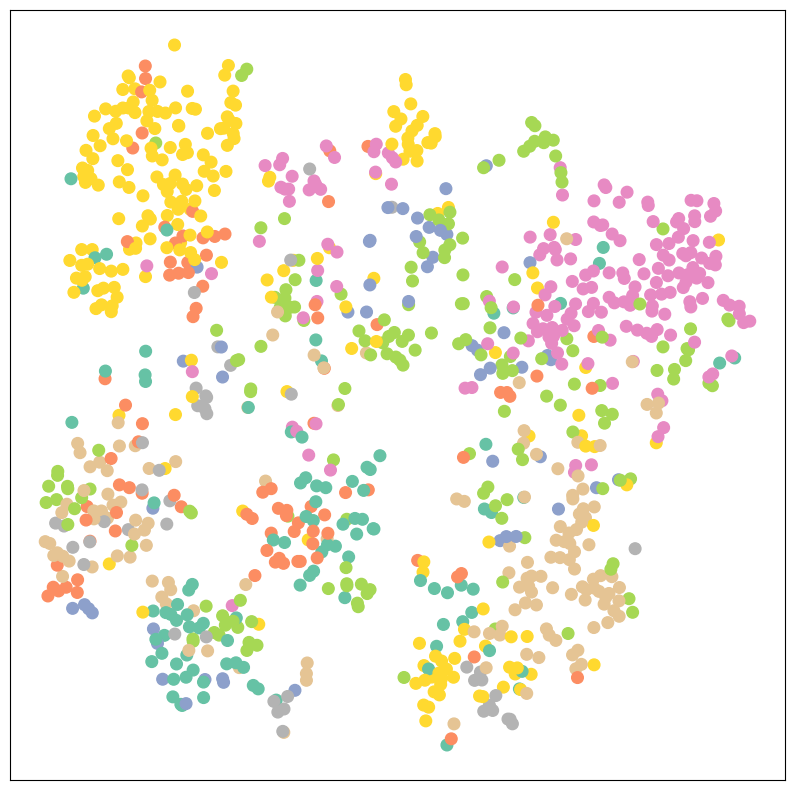

In [45]:
x_visual, out = model(data.x, data.adj_t)
visualize(x_visual[0:1000,], color=data.y[0:1000])

# 4) GNN: Graph Property Prediction

In this section we will create a graph neural network for graph property prediction (graph classification).

**Sheida**

The ogbg-molhiv dataset is a molecular property prediction dataset. All the molecules are pre-processed using RDKit. Each graph represents a molecule, where nodes are atoms, and edges are chemical bonds. Input node features are 9-dimensional. The task is to predict the target molecular properties as accurately as possible, where the molecular properties are cast as binary labels, e.g, whether a molecule inhibits HIV virus replication or not


## Load and preprocess the dataset

In [ ]:
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
from torch_geometric.data import DataLoader
from tqdm.notebook import tqdm

if 'IS_GRADESCOPE_ENV' not in os.environ:
  # Load the dataset
  dataset = PygGraphPropPredDataset(name='ogbg-molhiv')

  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  print('Device: {}'.format(device))

  split_idx = dataset.get_idx_split()

  # Check task type
  print('Task type: {}'.format(dataset.task_type))

Downloaded 0.00 GB: 100%|██████████| 3/3 [00:00<00:00, 11.57it/s]
Processing...


Extracting dataset/hiv.zip
Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 41127/41127 [00:00<00:00, 83432.23it/s]


Converting graphs into PyG objects...


100%|██████████| 41127/41127 [00:01<00:00, 22375.01it/s]


Saving...
Device: cuda
Task type: binary classification


Done!


In [ ]:
# Load the dataset splits into corresponding dataloaders
# We will train the graph classification task on a batch of 32 graphs
# Shuffle the order of graphs for training set
if 'IS_GRADESCOPE_ENV' not in os.environ:
  train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True, num_workers=0)
  valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False, num_workers=0)
  test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False, num_workers=0)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
i = 0
for step, batch in enumerate(train_loader):
  if i==0:
    print(step, batch)
    print(batch.ptr)
    print(batch.y)
    i+=1

0 DataBatch(edge_index=[2, 1976], edge_attr=[1976, 3], x=[928, 9], y=[32, 1], num_nodes=928, batch=[928], ptr=[33])
tensor([  0,  16,  48,  70,  90, 112, 144, 178, 199, 231, 255, 265, 282, 309,
        329, 381, 445, 467, 483, 503, 529, 557, 580, 614, 631, 768, 790, 812,
        837, 863, 895, 905, 928])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])


**Sheida**
each batch has 32 graph. so we have 32 labels. each graph can have differnet node like 10, 13, or anything. to you which nodes blongs to which tree. they keep cumulative sum of nodes for each graph in ptr. so first graph girst node is at index 0. second graph the first node start at index 16 and so on.

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  # Please do not change the args
  args = {
      'device': device,
      'num_layers': 5,
      'hidden_dim': 256,
      'dropout': 0.5,
      'lr': 0.001,
      'epochs': 30,
  }
  args

## Graph Prediction Model

### Graph Mini-Batching
Before diving into the actual model, we introduce the concept of mini-batching with graphs. In order to parallelize the processing of a mini-batch of graphs, PyG combines the graphs into a single disconnected graph data object (*torch_geometric.data.Batch*). *torch_geometric.data.Batch* inherits from *torch_geometric.data.Data* (introduced earlier) and contains an additional attribute called `batch`.

The `batch` attribute is a vector mapping each node to the index of its corresponding graph within the mini-batch:

    batch = [0, ..., 0, 1, ..., n - 2, n - 1, ..., n - 1]

This attribute is crucial for associating which graph each node belongs to and can be used to e.g. average the node embeddings for each graph individually to compute graph level embeddings.



### Implemention
Now, we have all of the tools to implement a GCN Graph Prediction model!  

We will reuse the existing GCN model to generate `node_embeddings` and then use  `Global Pooling` over the nodes to create graph level embeddings that can be used to predict properties for the each graph. Remeber that the `batch` attribute will be essential for performining Global Pooling over our mini-batch of graphs.

In [ ]:
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool

### GCN to predict graph property
class GCN_Graph(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()

        # Load encoders for Atoms in molecule graphs
        self.node_encoder = AtomEncoder(hidden_dim)

        # Node embedding model
        # Note that the input_dim and output_dim are set to hidden_dim
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)

        self.pool = global_mean_pool

        ############# Your code here ############
        ## Note:
        ## 1. Initialize self.pool as a global mean pooling layer
        ## For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers

        #########################################

        # Output layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)


    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()

    def forward(self, batched_data):
        # TODO: Implement a function that takes as input a
        # mini-batch of graphs (torch_geometric.data.Batch) and
        # returns the predicted graph property for each graph.
        #
        # NOTE: Since we are predicting graph level properties,
        # your output will be a tensor with dimension equaling
        # the number of graphs in the mini-batch


        # Extract important attributes of our mini-batch
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = self.node_encoder(x)

        node_embed = self.gnn_node(embed, edge_index)
        pooling_properties = self.pool(node_embed, batch)
        out = self.linear(pooling_properties)

        ############# Your code here ############
        ## Note:
        ## 1. Construct node embeddings using existing GCN model
        ## 2. Use the global pooling layer to aggregate features for each individual graph
        ## For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        ## 3. Use a linear layer to predict each graph's property
        ## (~3 lines of code)

        #########################################

        return out

In [ ]:
def train(model, device, data_loader, optimizer, loss_fn):
    # TODO: Implement a function that trains your model by
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    for step, batch in enumerate(tqdm(data_loader, desc="Iteration")):
      batch = batch.to(device)

      if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
          pass
          # first condition: isolated nodes or if the batch size is too small.
          # second: very large graphs or if the batch size is too large
      else:
        ## ignore nan targets (unlabeled) when computing training loss.
        is_labeled = batch.y == batch.y

        ############# Your code here ############
        ## Note:
        ## 1. Zero grad the optimizer
        ## 2. Feed the data into the model
        ## 3. Use `is_labeled` mask to filter output and labels
        ## 4. You may need to change the type of label to torch.float32
        ## 5. Feed the output and label to the loss_fn
        ## (~3 lines of code)
        optimizer.zero_grad()
        out = model(batch)
        loss = loss_fn(out[is_labeled], batch.y[is_labeled].float())

        # __________________ important __________________________
        # The first approach will only compute the loss for the nodes that have
        # valid labels, i.e., batch.y == batch.y. The second approach will
        # ignore the nan targets only if none of the nodes have valid labels,
        # i.e., is_labeled is False. Therefore, the first approach is more
        # accurate and robust than the second approach
        # second approach =
        # if is_labeled:
        #   loss = loss_fn(out.float32(), batch.y)


        #########################################
        loss.backward()
        optimizer.step()

    return loss.item()

In [ ]:
# The evaluation function
def eval(model, device, loader, evaluator, save_model_results=False, save_file=None):
    model.eval()
    y_true = []
    y_pred = []

    for step, batch in enumerate(tqdm(loader, desc="Iteration")):
        batch = batch.to(device)

        if batch.x.shape[0] == 1:
            pass
        else:
            with torch.no_grad():
                pred = model(batch)

            y_true.append(batch.y.view(pred.shape).detach().cpu())
            y_pred.append(pred.detach().cpu())

    y_true = torch.cat(y_true, dim = 0).numpy()
    y_pred = torch.cat(y_pred, dim = 0).numpy()

    input_dict = {"y_true": y_true, "y_pred": y_pred}

    if save_model_results:
        print ("Saving Model Predictions")

        # Create a pandas dataframe with a two columns
        # y_pred | y_true
        data = {}
        data['y_pred'] = y_pred.reshape(-1)
        data['y_true'] = y_true.reshape(-1)

        df = pd.DataFrame(data=data)
        # Save to csv
        df.to_csv('ogbg-molhiv_graph_' + save_file + '.csv', sep=',', index=False)

    return evaluator.eval(input_dict)

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  model = GCN_Graph(args['hidden_dim'],
              dataset.num_tasks, args['num_layers'],
              args['dropout']).to(device)
  evaluator = Evaluator(name='ogbg-molhiv')

In [ ]:
# Please do not change these args
# Training should take <10min using GPU runtime
import copy

if 'IS_GRADESCOPE_ENV' not in os.environ:
  model.reset_parameters()

  optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
  loss_fn = torch.nn.BCEWithLogitsLoss()

  best_model = None
  best_valid_acc = 0

  for epoch in range(1, 1 + args["epochs"]):
    print('Training...')
    loss = train(model, device, train_loader, optimizer, loss_fn)

    print('Evaluating...')
    train_result = eval(model, device, train_loader, evaluator)
    val_result = eval(model, device, valid_loader, evaluator)
    test_result = eval(model, device, test_loader, evaluator)

    train_acc, valid_acc, test_acc = train_result[dataset.eval_metric], val_result[dataset.eval_metric], test_result[dataset.eval_metric]
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)
    print(f'Epoch: {epoch:02d}, '
          f'Loss: {loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')

Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 01, Loss: 0.0159, Train: 71.77%, Valid: 74.92% Test: 70.81%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 02, Loss: 0.9294, Train: 73.06%, Valid: 75.09% Test: 68.54%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 03, Loss: 0.0496, Train: 75.34%, Valid: 77.52% Test: 69.73%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 04, Loss: 0.0169, Train: 77.07%, Valid: 75.77% Test: 70.69%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 05, Loss: 0.0971, Train: 78.02%, Valid: 70.28% Test: 71.20%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 06, Loss: 0.4531, Train: 78.54%, Valid: 76.48% Test: 71.78%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 07, Loss: 0.0456, Train: 79.68%, Valid: 74.75% Test: 70.09%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 08, Loss: 0.0267, Train: 80.20%, Valid: 76.18% Test: 72.81%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 09, Loss: 0.0441, Train: 78.86%, Valid: 76.44% Test: 71.24%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 10, Loss: 0.6295, Train: 79.14%, Valid: 76.63% Test: 72.43%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 11, Loss: 0.0239, Train: 79.30%, Valid: 74.09% Test: 73.85%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 12, Loss: 0.0235, Train: 80.19%, Valid: 75.87% Test: 73.17%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 13, Loss: 0.0499, Train: 78.33%, Valid: 74.07% Test: 72.65%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 14, Loss: 0.4682, Train: 80.54%, Valid: 78.08% Test: 71.77%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.0447, Train: 80.37%, Valid: 76.01% Test: 72.27%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.0383, Train: 80.97%, Valid: 74.55% Test: 70.40%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.0352, Train: 81.45%, Valid: 77.87% Test: 72.99%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.0960, Train: 80.85%, Valid: 76.71% Test: 70.25%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.0212, Train: 80.76%, Valid: 75.99% Test: 70.18%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.0163, Train: 81.98%, Valid: 75.75% Test: 72.06%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.0259, Train: 81.80%, Valid: 76.09% Test: 69.55%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.0195, Train: 82.39%, Valid: 78.11% Test: 72.15%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.0463, Train: 81.80%, Valid: 77.43% Test: 72.82%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 24, Loss: 1.2796, Train: 82.38%, Valid: 76.02% Test: 71.42%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.0401, Train: 82.80%, Valid: 77.38% Test: 73.79%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.0155, Train: 83.23%, Valid: 76.86% Test: 72.78%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.0220, Train: 83.44%, Valid: 77.86% Test: 74.99%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.0507, Train: 83.67%, Valid: 78.40% Test: 74.81%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.0362, Train: 83.41%, Valid: 76.49% Test: 75.23%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.0423, Train: 83.19%, Valid: 75.43% Test: 73.60%


## Question 6: What are your `best_model` validation and test ROC-AUC scores? (20 points)

Run the cell below to see the results of your best of model and save your model's predictions over the validation and test datasets. The resulting files are named *ogbn-arxiv_graph_valid.csv* and *ogbn-arxiv_graph_test.csv*.

Again, you can view these files by clicking on the *Folder* icon on the left side pannel. As in Colab 1, when you sumbit your assignment, you will have to download these files and attatch them to your submission.

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  train_acc = eval(best_model, device, train_loader, evaluator)[dataset.eval_metric]
  valid_acc = eval(best_model, device, valid_loader, evaluator, save_model_results=True, save_file="valid")[dataset.eval_metric]
  test_acc  = eval(best_model, device, test_loader, evaluator, save_model_results=True, save_file="test")[dataset.eval_metric]

  print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Saving Model Predictions


Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Saving Model Predictions
Best model: Train: 83.67%, Valid: 78.40% Test: 74.81%


## Question 7 (Optional): Experiment with the two other global pooling layers in Pytorch Geometric.

# Submission

To submit Colab 2, please submit to the following assignments on Gradescope:

1. "Colab 2": submit your answers to the questions in this assignment
2. "Colab 2 Code": submit your completed *CS224W_Colab2.ipynb*. From the "File" menu select "Download .ipynb" to save a local copy of your completed Colab. **PLEASE DO NOT CHANGE THE NAME!** The autograder depends on the .ipynb file being called "CS224W_Colab2.ipynb".